In [1]:
#NA SALES
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV data
df = pd.read_csv('Resources/DataSets/Global Sales/videogames_final.csv')

# Create a LabelEncoder instance for Genre column
genre_encoder = LabelEncoder()
df['Genre'] = genre_encoder.fit_transform(df['Genre'])

# Create a LabelEncoder instance for Platform column
platform_encoder = LabelEncoder()
df['Platform'] = platform_encoder.fit_transform(df['Platform'])

# Split the data into training and testing sets
X = df[['Genre', 'Platform']].values
y = df['NA_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler to the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(300, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print('Mean Squared Error:', mse)

# Convert the platform values back to strings for printing results
X_test_decoded = X_test.copy().astype(object)
X_test_decoded[:, 1] = platform_encoder.inverse_transform(X_test[:, 1].astype(int))

# Decode the numerical representations of Genre back to original values
genre_labels = genre_encoder.inverse_transform(X_test[:, 0].astype(int))

# Calculate the sum of sales for each Genre
genre_sales = {}
for genre, sales in zip(genre_labels, y_test):
    if genre in genre_sales:
        genre_sales[genre] += sales
    else:
        genre_sales[genre] = sales

# Calculate the sum of sales for each Platform
platform_sales = {}
for platform, sales in zip(X_test_decoded[:, 1], y_test):
    if platform in platform_sales:
        platform_sales[platform] += sales
    else:
        platform_sales[platform] = sales

# Sort the genre_sales dictionary in descending order of sales
genre_sales_sorted = dict(sorted(genre_sales.items(), key=lambda item: item[1], reverse=True))

# Sort the platform_sales dictionary in descending order of sales
platform_sales_sorted = dict(sorted(platform_sales.items(), key=lambda item: item[1], reverse=True))

# Print the sum of sales for each Genre in descending order
print("Sales by Genre:")
for genre, sales in genre_sales_sorted.items():
    print('Genre:', genre, 'Total Sales:', sales)

# Print the sum of sales for each Platform in descending order
print("\nSales by Platform:")
for platform, sales in platform_sales_sorted.items():
    print('Platform:', platform, 'Total Sales:', sales)


Train on 19058 samples
Epoch 1/25
19058/19058 [==============================] - 1s 55us/sample - loss: 0.8475
Epoch 2/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.8435
Epoch 3/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.8414
Epoch 4/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.8410
Epoch 5/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.8389
Epoch 6/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.8379
Epoch 7/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.8364
Epoch 8/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.8357
Epoch 9/25
19058/19058 [==============================] - 1s 33us/sample - loss: 0.8338
Epoch 10/25
19058/19058 [==============================] - 1s 33us/sample - loss: 0.8356
Epoch 11/25
19058/19058 [==============================] - 1s 33us/sample - loss: 0.8338
Epoch 1

Mean Squared Error: 0.3002332335758367
Sales by Genre:
Genre: Action Total Sales: 126.96999999999998
Genre: Sports Total Sales: 87.06
Genre: Shooter Total Sales: 75.27000000000002
Genre: Misc Total Sales: 60.79999999999999
Genre: Platform Total Sales: 47.46000000000002
Genre: Racing Total Sales: 44.05
Genre: Role-Playing Total Sales: 39.32
Genre: Simulation Total Sales: 26.690000000000005
Genre: Fighting Total Sales: 24.399999999999995
Genre: Puzzle Total Sales: 14.719999999999999
Genre: Adventure Total Sales: 9.219999999999999
Genre: Strategy Total Sales: 4.989999999999998

Sales by Platform:
Platform: X360 Total Sales: 108.55999999999996
Platform: PS3 Total Sales: 70.49999999999999
Platform: PS2 Total Sales: 66.82000000000005
Platform: DS Total Sales: 63.08999999999999
Platform: Wii Total Sales: 58.580000000000005
Platform: PS Total Sales: 35.18999999999999
Platform: PS4 Total Sales: 23.669999999999998
Platform: PSP Total Sales: 21.280000000000012
Platform: GBA Total Sales: 20.199999

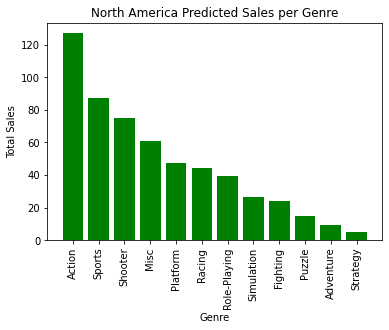

In [2]:
#PREDICTED
import matplotlib.pyplot as plt

# Calculate the sum of sales for each Genre
genre_sales = {}
for genre, sales in zip(genre_labels, y_test):
    if genre in genre_sales:
        genre_sales[genre] += sales
    else:
        genre_sales[genre] = sales

# Sort the genre_sales dictionary in descending order of sales
genre_sales_sorted = dict(sorted(genre_sales.items(), key=lambda item: item[1], reverse=True))

# Extract genre and sales values for plotting
genres = list(genre_sales_sorted.keys())
sales = list(genre_sales_sorted.values())




# Create the bar plot
plt.bar(genres, sales, color='green', width=0.8)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('North America Predicted Sales per Genre')
plt.xticks(rotation=90)
plt.show()

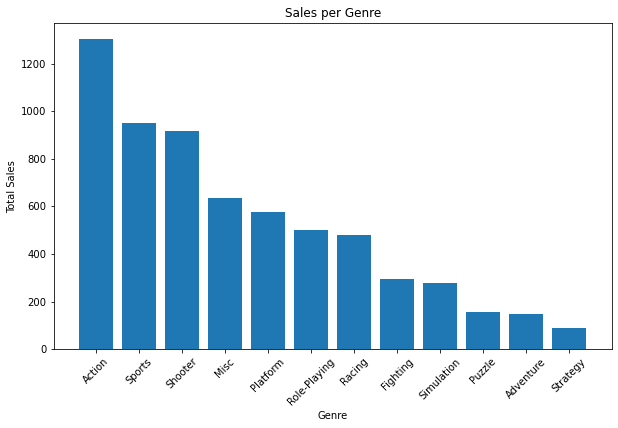

In [4]:
#ACTUAL SALES AS PER DATASET
genre_labels = genre_encoder.inverse_transform(df['Genre'])

# Calculate the sum of sales for each genre in the original data
df_genre_sales = df.groupby(genre_labels)['NA_Sales'].sum().sort_values(ascending=False)

# Plot the sales per genre
plt.figure(figsize=(10, 6))
plt.bar(df_genre_sales.index, df_genre_sales.values)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Sales per Genre')
plt.xticks(rotation=45)
plt.show()

In [5]:
#JP_SALES
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV data
df = pd.read_csv('Resources/DataSets/Global Sales/videogames_final.csv')

# Create a LabelEncoder instance for Genre column
genre_encoder = LabelEncoder()
df['Genre'] = genre_encoder.fit_transform(df['Genre'])

# Create a LabelEncoder instance for Platform column
platform_encoder = LabelEncoder()
df['Platform'] = platform_encoder.fit_transform(df['Platform'])

# Split the data into training and testing sets
X = df[['Genre', 'Platform']].values
y = df['JP_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler to the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(300, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print('Mean Squared Error:', mse)

# Convert the platform values back to strings for printing results
X_test_decoded = X_test.copy().astype(object)
X_test_decoded[:, 1] = platform_encoder.inverse_transform(X_test[:, 1].astype(int))

# Decode the numerical representations of Genre back to original values
genre_labels = genre_encoder.inverse_transform(X_test[:, 0].astype(int))

# Calculate the sum of sales for each Genre
genre_sales = {}
for genre, sales in zip(genre_labels, y_test):
    if genre in genre_sales:
        genre_sales[genre] += sales
    else:
        genre_sales[genre] = sales

# Calculate the sum of sales for each Platform
platform_sales = {}
for platform, sales in zip(X_test_decoded[:, 1], y_test):
    if platform in platform_sales:
        platform_sales[platform] += sales
    else:
        platform_sales[platform] = sales

# Sort the genre_sales dictionary in descending order of sales
genre_sales_sorted = dict(sorted(genre_sales.items(), key=lambda item: item[1], reverse=True))

# Sort the platform_sales dictionary in descending order of sales
platform_sales_sorted = dict(sorted(platform_sales.items(), key=lambda item: item[1], reverse=True))

# Print the sum of sales for each Genre in descending order
print("Sales by Genre:")
for genre, sales in genre_sales_sorted.items():
    print('Genre:', genre, 'Total Sales:', sales)

# Print the sum of sales for each Platform in descending order
print("\nSales by Platform:")
for platform, sales in platform_sales_sorted.items():
    print('Platform:', platform, 'Total Sales:', sales)


Train on 19058 samples
Epoch 1/25
19058/19058 [==============================] - 1s 51us/sample - loss: 0.1094
Epoch 2/25
19058/19058 [==============================] - 1s 33us/sample - loss: 0.1072
Epoch 3/25
19058/19058 [==============================] - 1s 33us/sample - loss: 0.1056
Epoch 4/25
19058/19058 [==============================] - 1s 33us/sample - loss: 0.1047
Epoch 5/25
19058/19058 [==============================] - 1s 34us/sample - loss: 0.1047
Epoch 6/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.1038
Epoch 7/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.1037
Epoch 8/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.1033
Epoch 9/25
19058/19058 [==============================] - 1s 32us/sample - loss: 0.1036
Epoch 10/25
19058/19058 [==============================] - 1s 33us/sample - loss: 0.1028
Epoch 11/25
19058/19058 [==============================] - 1s 33us/sample - loss: 0.1034
Epoch 1

Mean Squared Error: 0.037880560440363975
Sales by Genre:
Genre: Role-Playing Total Sales: 28.89
Genre: Misc Total Sales: 20.949999999999996
Genre: Action Total Sales: 18.689999999999994
Genre: Sports Total Sales: 10.659999999999997
Genre: Platform Total Sales: 9.11
Genre: Fighting Total Sales: 7.34
Genre: Simulation Total Sales: 4.58
Genre: Puzzle Total Sales: 4.4799999999999995
Genre: Strategy Total Sales: 3.9599999999999995
Genre: Racing Total Sales: 3.6800000000000006
Genre: Shooter Total Sales: 3.6699999999999977
Genre: Adventure Total Sales: 3.1299999999999977

Sales by Platform:
Platform: DS Total Sales: 29.44000000000001
Platform: PS2 Total Sales: 11.569999999999995
Platform: PS3 Total Sales: 11.50999999999999
Platform: PS Total Sales: 11.290000000000001
Platform: SNES Total Sales: 8.02
Platform: Wii Total Sales: 6.699999999999999
Platform: PSP Total Sales: 6.519999999999997
Platform: 3DS Total Sales: 6.270000000000001
Platform: NES Total Sales: 6.17
Platform: GBA Total Sales: 5

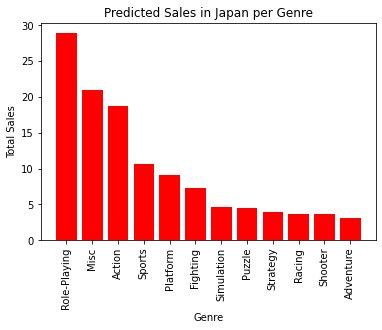

In [6]:
#PREDICTED SALES PER GENRE

import matplotlib.pyplot as plt

# Calculate the sum of sales for each Genre
genre_sales = {}
for genre, sales in zip(genre_labels, y_test):
    if genre in genre_sales:
        genre_sales[genre] += sales
    else:
        genre_sales[genre] = sales

# Sort the genre_sales dictionary in descending order of sales
genre_sales_sorted = dict(sorted(genre_sales.items(), key=lambda item: item[1], reverse=True))

# Extract genre and sales values for plotting
genres = list(genre_sales_sorted.keys())
sales = list(genre_sales_sorted.values())




# Create the bar plot
plt.bar(genres, sales, color='red', width=0.8)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Predicted Sales in Japan per Genre')
plt.xticks(rotation=90)
plt.show()

In [8]:
#EU-SALES
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV data
df = pd.read_csv('Resources/DataSets/Global Sales/videogames_final.csv')

# Create a LabelEncoder instance for Genre column
genre_encoder = LabelEncoder()
df['Genre'] = genre_encoder.fit_transform(df['Genre'])

# Create a LabelEncoder instance for Platform column
platform_encoder = LabelEncoder()
df['Platform'] = platform_encoder.fit_transform(df['Platform'])

# Split the data into training and testing sets
X = df[['Genre', 'Platform']].values
y = df['EU_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler to the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(300, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print('Mean Squared Error:', mse)

# Convert the platform values back to strings for printing results
X_test_decoded = X_test.copy().astype(object)
X_test_decoded[:, 1] = platform_encoder.inverse_transform(X_test[:, 1].astype(int))

# Decode the numerical representations of Genre back to original values
genre_labels = genre_encoder.inverse_transform(X_test[:, 0].astype(int))

# Calculate the sum of sales for each Genre
genre_sales = {}
for genre, sales in zip(genre_labels, y_test):
    if genre in genre_sales:
        genre_sales[genre] += sales
    else:
        genre_sales[genre] = sales

# Calculate the sum of sales for each Platform
platform_sales = {}
for platform, sales in zip(X_test_decoded[:, 1], y_test):
    if platform in platform_sales:
        platform_sales[platform] += sales
    else:
        platform_sales[platform] = sales

# Sort the genre_sales dictionary in descending order of sales
genre_sales_sorted = dict(sorted(genre_sales.items(), key=lambda item: item[1], reverse=True))

# Sort the platform_sales dictionary in descending order of sales
platform_sales_sorted = dict(sorted(platform_sales.items(), key=lambda item: item[1], reverse=True))

# Print the sum of sales for each Genre in descending order
print("Sales by Genre:")
for genre, sales in genre_sales_sorted.items():
    print('Genre:', genre, 'Total Sales:', sales)

# Print the sum of sales for each Platform in descending order
print("\nSales by Platform:")
for platform, sales in platform_sales_sorted.items():
    print('Platform:', platform, 'Total Sales:', sales)


Train on 19058 samples
Epoch 1/25
19058/19058 [==============================] - 1s 59us/sample - loss: 0.3717
Epoch 2/25
19058/19058 [==============================] - 1s 38us/sample - loss: 0.3697
Epoch 3/25
19058/19058 [==============================] - 1s 37us/sample - loss: 0.3691
Epoch 4/25
19058/19058 [==============================] - 1s 35us/sample - loss: 0.3678
Epoch 5/25
19058/19058 [==============================] - 1s 36us/sample - loss: 0.3673
Epoch 6/25
19058/19058 [==============================] - 1s 34us/sample - loss: 0.3662
Epoch 7/25
19058/19058 [==============================] - 1s 34us/sample - loss: 0.3658
Epoch 8/25
19058/19058 [==============================] - 1s 34us/sample - loss: 0.3655
Epoch 9/25
19058/19058 [==============================] - 1s 38us/sample - loss: 0.3648
Epoch 10/25
19058/19058 [==============================] - 1s 36us/sample - loss: 0.3647
Epoch 11/25
19058/19058 [==============================] - 1s 34us/sample - loss: 0.3639
Epoch 1

Mean Squared Error: 0.19908926662891344
Sales by Genre:
Genre: Action Total Sales: 80.88000000000008
Genre: Sports Total Sales: 57.82000000000002
Genre: Shooter Total Sales: 45.56999999999999
Genre: Misc Total Sales: 37.610000000000014
Genre: Racing Total Sales: 33.550000000000004
Genre: Platform Total Sales: 27.929999999999996
Genre: Role-Playing Total Sales: 23.84
Genre: Simulation Total Sales: 13.769999999999994
Genre: Fighting Total Sales: 12.439999999999994
Genre: Adventure Total Sales: 6.2799999999999985
Genre: Puzzle Total Sales: 6.059999999999997
Genre: Strategy Total Sales: 3.9799999999999986

Sales by Platform:
Platform: PS3 Total Sales: 64.98000000000002
Platform: X360 Total Sales: 53.33000000000002
Platform: DS Total Sales: 35.22
Platform: PS2 Total Sales: 32.010000000000005
Platform: Wii Total Sales: 31.490000000000013
Platform: PS4 Total Sales: 29.03999999999999
Platform: PC Total Sales: 25.409999999999997
Platform: PS Total Sales: 22.189999999999987
Platform: PSP Total S

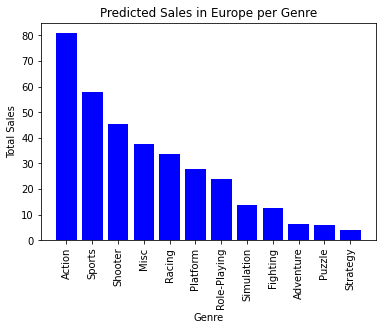

In [9]:
import matplotlib.pyplot as plt

# Calculate the sum of sales for each Genre
genre_sales = {}
for genre, sales in zip(genre_labels, y_test):
    if genre in genre_sales:
        genre_sales[genre] += sales
    else:
        genre_sales[genre] = sales

# Sort the genre_sales dictionary in descending order of sales
genre_sales_sorted = dict(sorted(genre_sales.items(), key=lambda item: item[1], reverse=True))

# Extract genre and sales values for plotting
genres = list(genre_sales_sorted.keys())
sales = list(genre_sales_sorted.values())




# Create the bar plot
plt.bar(genres, sales, color='blue', width=0.8)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Predicted Sales in Europe per Genre')
plt.xticks(rotation=90)
plt.show()

In [10]:
#GLOBAL-SALES
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV data
df = pd.read_csv('Resources/DataSets/Global Sales/videogames_final.csv')

# Create a LabelEncoder instance for Genre column
genre_encoder = LabelEncoder()
df['Genre'] = genre_encoder.fit_transform(df['Genre'])

# Create a LabelEncoder instance for Platform column
platform_encoder = LabelEncoder()
df['Platform'] = platform_encoder.fit_transform(df['Platform'])

# Split the data into training and testing sets
X = df[['Genre', 'Platform']].values
y = df['Global_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler to the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(300, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print('Mean Squared Error:', mse)

# Convert the platform values back to strings for printing results
X_test_decoded = X_test.copy().astype(object)
X_test_decoded[:, 1] = platform_encoder.inverse_transform(X_test[:, 1].astype(int))

# Decode the numerical representations of Genre back to original values
genre_labels = genre_encoder.inverse_transform(X_test[:, 0].astype(int))

# Calculate the sum of sales for each Genre
genre_sales = {}
for genre, sales in zip(genre_labels, y_test):
    if genre in genre_sales:
        genre_sales[genre] += sales
    else:
        genre_sales[genre] = sales

# Calculate the sum of sales for each Platform
platform_sales = {}
for platform, sales in zip(X_test_decoded[:, 1], y_test):
    if platform in platform_sales:
        platform_sales[platform] += sales
    else:
        platform_sales[platform] = sales

# Sort the genre_sales dictionary in descending order of sales
genre_sales_sorted = dict(sorted(genre_sales.items(), key=lambda item: item[1], reverse=True))

# Sort the platform_sales dictionary in descending order of sales
platform_sales_sorted = dict(sorted(platform_sales.items(), key=lambda item: item[1], reverse=True))

# Print the sum of sales for each Genre in descending order
print("Sales by Genre:")
for genre, sales in genre_sales_sorted.items():
    print('Genre:', genre, 'Total Sales:', sales)

# Print the sum of sales for each Platform in descending order
print("\nSales by Platform:")
for platform, sales in platform_sales_sorted.items():
    print('Platform:', platform, 'Total Sales:', sales)


Train on 19058 samples
Epoch 1/25
19058/19058 [==============================] - 1s 53us/sample - loss: 3.3057
Epoch 2/25
19058/19058 [==============================] - 1s 34us/sample - loss: 3.2767
Epoch 3/25
19058/19058 [==============================] - 1s 34us/sample - loss: 3.2705
Epoch 4/25
19058/19058 [==============================] - 1s 34us/sample - loss: 3.2682
Epoch 5/25
19058/19058 [==============================] - 1s 34us/sample - loss: 3.2658
Epoch 6/25
19058/19058 [==============================] - 1s 34us/sample - loss: 3.2604
Epoch 7/25
19058/19058 [==============================] - 1s 34us/sample - loss: 3.2576
Epoch 8/25
19058/19058 [==============================] - 1s 33us/sample - loss: 3.2543
Epoch 9/25
19058/19058 [==============================] - 1s 33us/sample - loss: 3.2488
Epoch 10/25
19058/19058 [==============================] - 1s 34us/sample - loss: 3.2455
Epoch 11/25
19058/19058 [==============================] - 1s 35us/sample - loss: 3.2450
Epoch 1

Mean Squared Error: 1.3075712166578843
Sales by Genre:
Genre: Action Total Sales: 253.27999999999994
Genre: Sports Total Sales: 174.11999999999998
Genre: Shooter Total Sales: 139.89999999999998
Genre: Misc Total Sales: 132.0099999999999
Genre: Role-Playing Total Sales: 101.30000000000001
Genre: Platform Total Sales: 93.55000000000003
Genre: Racing Total Sales: 91.68000000000006
Genre: Simulation Total Sales: 49.010000000000005
Genre: Fighting Total Sales: 48.93999999999999
Genre: Puzzle Total Sales: 26.720000000000006
Genre: Adventure Total Sales: 20.43000000000001
Genre: Strategy Total Sales: 14.129999999999997

Sales by Platform:
Platform: X360 Total Sales: 180.17999999999992
Platform: PS3 Total Sales: 173.9000000000001
Platform: DS Total Sales: 138.48999999999995
Platform: PS2 Total Sales: 125.79999999999995
Platform: Wii Total Sales: 106.31
Platform: PS Total Sales: 73.33
Platform: PS4 Total Sales: 65.42999999999998
Platform: PSP Total Sales: 47.149999999999984
Platform: PC Total S

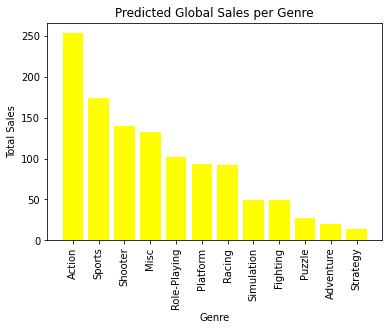

In [11]:
import matplotlib.pyplot as plt

# Calculate the sum of sales for each Genre
genre_sales = {}
for genre, sales in zip(genre_labels, y_test):
    if genre in genre_sales:
        genre_sales[genre] += sales
    else:
        genre_sales[genre] = sales

# Sort the genre_sales dictionary in descending order of sales
genre_sales_sorted = dict(sorted(genre_sales.items(), key=lambda item: item[1], reverse=True))

# Extract genre and sales values for plotting
genres = list(genre_sales_sorted.keys())
sales = list(genre_sales_sorted.values())




# Create the bar plot
plt.bar(genres, sales, color='yellow', width=0.8)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Predicted Global Sales per Genre')
plt.xticks(rotation=90)
plt.show()

In [12]:
#OTHER-SALES
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the CSV data
df = pd.read_csv('Resources/DataSets/Global Sales/videogames_final.csv')

# Create a LabelEncoder instance for Genre column
genre_encoder = LabelEncoder()
df['Genre'] = genre_encoder.fit_transform(df['Genre'])

# Create a LabelEncoder instance for Platform column
platform_encoder = LabelEncoder()
df['Platform'] = platform_encoder.fit_transform(df['Platform'])

# Split the data into training and testing sets
X = df[['Genre', 'Platform']].values
y = df['Other_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler to the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(300, input_dim=2, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print('Mean Squared Error:', mse)

# Convert the platform values back to strings for printing results
X_test_decoded = X_test.copy().astype(object)
X_test_decoded[:, 1] = platform_encoder.inverse_transform(X_test[:, 1].astype(int))

# Decode the numerical representations of Genre back to original values
genre_labels = genre_encoder.inverse_transform(X_test[:, 0].astype(int))

# Calculate the sum of sales for each Genre
genre_sales = {}
for genre, sales in zip(genre_labels, y_test):
    if genre in genre_sales:
        genre_sales[genre] += sales
    else:
        genre_sales[genre] = sales

# Calculate the sum of sales for each Platform
platform_sales = {}
for platform, sales in zip(X_test_decoded[:, 1], y_test):
    if platform in platform_sales:
        platform_sales[platform] += sales
    else:
        platform_sales[platform] = sales

# Sort the genre_sales dictionary in descending order of sales
genre_sales_sorted = dict(sorted(genre_sales.items(), key=lambda item: item[1], reverse=True))

# Sort the platform_sales dictionary in descending order of sales
platform_sales_sorted = dict(sorted(platform_sales.items(), key=lambda item: item[1], reverse=True))

# Print the sum of sales for each Genre in descending order
print("Sales by Genre:")
for genre, sales in genre_sales_sorted.items():
    print('Genre:', genre, 'Total Sales:', sales)

# Print the sum of sales for each Platform in descending order
print("\nSales by Platform:")
for platform, sales in platform_sales_sorted.items():
    print('Platform:', platform, 'Total Sales:', sales)


Train on 19058 samples
Epoch 1/25
19058/19058 [==============================] - 1s 60us/sample - loss: 0.0475
Epoch 2/25
19058/19058 [==============================] - 1s 34us/sample - loss: 0.0476
Epoch 3/25
19058/19058 [==============================] - 1s 35us/sample - loss: 0.0476
Epoch 4/25
19058/19058 [==============================] - 1s 36us/sample - loss: 0.0476
Epoch 5/25
19058/19058 [==============================] - 1s 34us/sample - loss: 0.0476
Epoch 6/25
19058/19058 [==============================] - 1s 36us/sample - loss: 0.0476
Epoch 7/25
19058/19058 [==============================] - 1s 35us/sample - loss: 0.0476
Epoch 8/25
19058/19058 [==============================] - 1s 36us/sample - loss: 0.0476
Epoch 9/25
19058/19058 [==============================] - 1s 34us/sample - loss: 0.0476
Epoch 10/25
19058/19058 [==============================] - 1s 36us/sample - loss: 0.0476
Epoch 11/25
19058/19058 [==============================] - 1s 35us/sample - loss: 0.0476
Epoch 1

Mean Squared Error: 0.02512743108172842
Sales by Genre:
Genre: Action Total Sales: 26.510000000000034
Genre: Sports Total Sales: 18.599999999999994
Genre: Shooter Total Sales: 15.35999999999999
Genre: Misc Total Sales: 12.56999999999998
Genre: Racing Total Sales: 10.389999999999988
Genre: Role-Playing Total Sales: 9.259999999999987
Genre: Platform Total Sales: 9.06999999999999
Genre: Fighting Total Sales: 4.699999999999999
Genre: Simulation Total Sales: 3.909999999999998
Genre: Adventure Total Sales: 1.7700000000000005
Genre: Puzzle Total Sales: 1.4600000000000006
Genre: Strategy Total Sales: 1.1700000000000002

Sales by Platform:
Platform: PS3 Total Sales: 26.88000000000003
Platform: X360 Total Sales: 16.019999999999985
Platform: PS2 Total Sales: 15.409999999999982
Platform: DS Total Sales: 10.639999999999974
Platform: PS4 Total Sales: 10.059999999999995
Platform: Wii Total Sales: 9.38999999999998
Platform: PSP Total Sales: 7.619999999999994
Platform: PC Total Sales: 4.669999999999995

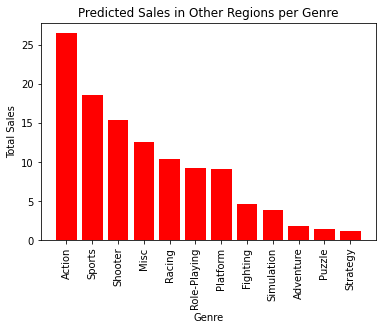

In [13]:
import matplotlib.pyplot as plt

# Calculate the sum of sales for each Genre
genre_sales = {}
for genre, sales in zip(genre_labels, y_test):
    if genre in genre_sales:
        genre_sales[genre] += sales
    else:
        genre_sales[genre] = sales

# Sort the genre_sales dictionary in descending order of sales
genre_sales_sorted = dict(sorted(genre_sales.items(), key=lambda item: item[1], reverse=True))

# Extract genre and sales values for plotting
genres = list(genre_sales_sorted.keys())
sales = list(genre_sales_sorted.values())




# Create the bar plot
plt.bar(genres, sales, color='red', width=0.8)
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Predicted Sales in Other Regions per Genre')
plt.xticks(rotation=90)
plt.show()